In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# **8:2**

In [2]:
df = pd.read_csv("ETH.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1899,2928.701904
1900,2949.359619
1901,2881.157959
1902,3037.056641


In [3]:
# Chia tập dữ liệu thành train, test
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1523
Test data size: 381


In [4]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [6]:
# Đánh giá độ chính xác
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', mape_test)
mae_test = np.mean(np.abs(y_test - y_pred))
print("Testing MAE:", mae_test)

Testing RMSE: 935.7476570573444
Testing MAPE: 44.35337941978169
Testing MAE: 854.8545567706361


Predicted Close Prices for the next 30 days:
[3393.46838829 3395.2234217  3396.97845511 3398.73348852 3400.48852192
 3402.24355533 3403.99858874 3405.75362215 3407.50865556 3409.26368896
 3411.01872237 3412.77375578 3414.52878919 3416.2838226  3418.038856
 3419.79388941 3421.54892282 3423.30395623 3425.05898964 3426.81402304
 3428.56905645 3430.32408986 3432.07912327 3433.83415668 3435.58919008
 3437.34422349 3439.0992569  3440.85429031 3442.60932372 3444.36435712]


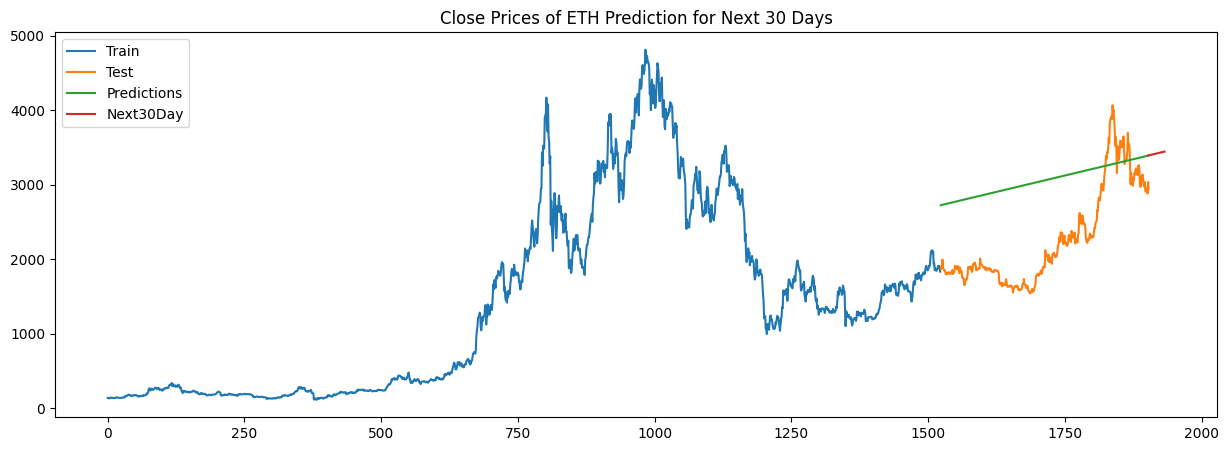

In [7]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted Close Prices for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Predictions','Next30Day'])
plt.title(f'Close Prices of ETH Prediction for Next 30 Days')
plt.show()

Predicted closing prices for the next 60 days:
[3393.46838829 3395.2234217  3396.97845511 3398.73348852 3400.48852192
 3402.24355533 3403.99858874 3405.75362215 3407.50865556 3409.26368896
 3411.01872237 3412.77375578 3414.52878919 3416.2838226  3418.038856
 3419.79388941 3421.54892282 3423.30395623 3425.05898964 3426.81402304
 3428.56905645 3430.32408986 3432.07912327 3433.83415668 3435.58919008
 3437.34422349 3439.0992569  3440.85429031 3442.60932372 3444.36435712
 3446.11939053 3447.87442394 3449.62945735 3451.38449076 3453.13952416
 3454.89455757 3456.64959098 3458.40462439 3460.1596578  3461.9146912
 3463.66972461 3465.42475802 3467.17979143 3468.93482484 3470.68985824
 3472.44489165 3474.19992506 3475.95495847 3477.70999188 3479.46502529
 3481.22005869 3482.9750921  3484.73012551 3486.48515892 3488.24019233
 3489.99522573 3491.75025914 3493.50529255 3495.26032596 3497.01535937]


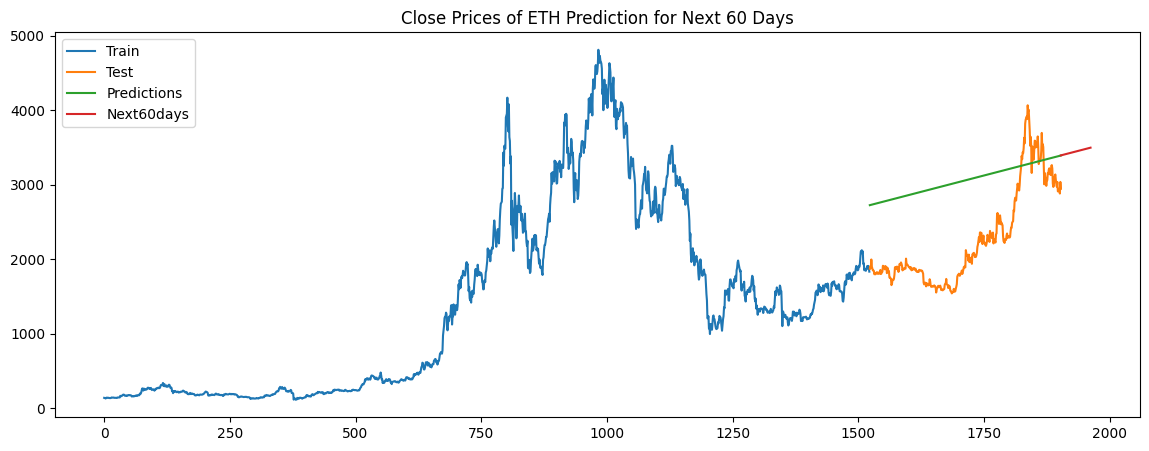

In [8]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Tạo mảng 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Dự đoán
y_next_60_days = model.predict(x_next_60_days)

# In ra dự đoán giá trong 60 ngày tiếp theo
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions','Next60days'])
plt.title(f'Close Prices of ETH Prediction for Next 60 Days')
plt.show()

Predicted closing prices for the next 90 days:
[3393.46838829 3395.2234217  3396.97845511 3398.73348852 3400.48852192
 3402.24355533 3403.99858874 3405.75362215 3407.50865556 3409.26368896
 3411.01872237 3412.77375578 3414.52878919 3416.2838226  3418.038856
 3419.79388941 3421.54892282 3423.30395623 3425.05898964 3426.81402304
 3428.56905645 3430.32408986 3432.07912327 3433.83415668 3435.58919008
 3437.34422349 3439.0992569  3440.85429031 3442.60932372 3444.36435712
 3446.11939053 3447.87442394 3449.62945735 3451.38449076 3453.13952416
 3454.89455757 3456.64959098 3458.40462439 3460.1596578  3461.9146912
 3463.66972461 3465.42475802 3467.17979143 3468.93482484 3470.68985824
 3472.44489165 3474.19992506 3475.95495847 3477.70999188 3479.46502529
 3481.22005869 3482.9750921  3484.73012551 3486.48515892 3488.24019233
 3489.99522573 3491.75025914 3493.50529255 3495.26032596 3497.01535937
 3498.77039277 3500.52542618 3502.28045959 3504.035493   3505.79052641
 3507.54555981 3509.30059322 3511

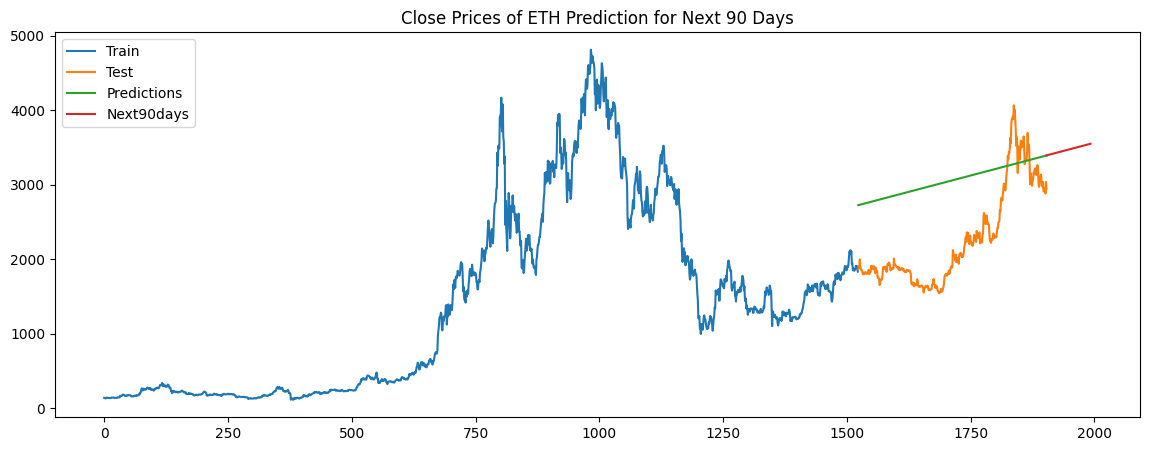

In [9]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo mảng 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán
y_next_90_days = model.predict(x_next_90_days)

# In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test','Predictions','Next90days'])
plt.title(f'Close Prices of ETH Prediction for Next 90 Days')
plt.show()

# **7:3**

In [10]:
df = pd.read_csv("ETH.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1899,2928.701904
1900,2949.359619
1901,2881.157959
1902,3037.056641


In [11]:
# Chia tập dữ liệu thành train, test
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1332
Test data size: 572


In [12]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [14]:
# Đánh giá độ chính xác
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', mape_test)
mae_test = np.mean(np.abs(y_test - y_pred))
print("Testing MAE:", mae_test)

Testing RMSE: 1768.0586183460746
Testing MAPE: 96.58918243716398
Testing MAE: 1726.8626081247967


Predicted Close Prices for the next 30 days:
[4467.28721805 4469.79099483 4472.2947716  4474.79854838 4477.30232516
 4479.80610193 4482.30987871 4484.81365549 4487.31743227 4489.82120904
 4492.32498582 4494.8287626  4497.33253938 4499.83631615 4502.34009293
 4504.84386971 4507.34764648 4509.85142326 4512.35520004 4514.85897682
 4517.36275359 4519.86653037 4522.37030715 4524.87408392 4527.3778607
 4529.88163748 4532.38541426 4534.88919103 4537.39296781 4539.89674459]


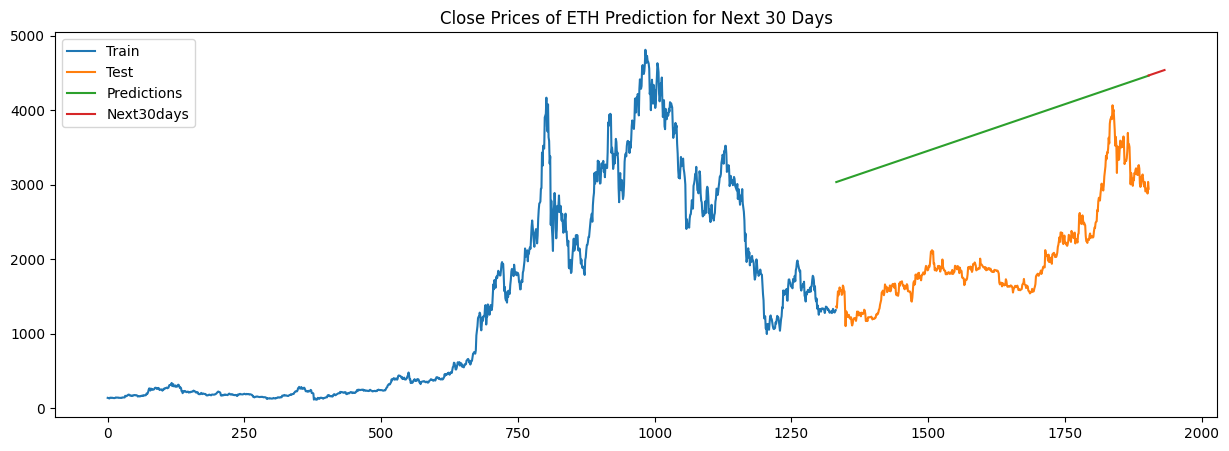

In [15]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted Close Prices for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Predictions','Next30days'])
plt.title(f'Close Prices of ETH Prediction for Next 30 Days')
plt.show()

Predicted closing prices for the next 60 days:
[4467.28721805 4469.79099483 4472.2947716  4474.79854838 4477.30232516
 4479.80610193 4482.30987871 4484.81365549 4487.31743227 4489.82120904
 4492.32498582 4494.8287626  4497.33253938 4499.83631615 4502.34009293
 4504.84386971 4507.34764648 4509.85142326 4512.35520004 4514.85897682
 4517.36275359 4519.86653037 4522.37030715 4524.87408392 4527.3778607
 4529.88163748 4532.38541426 4534.88919103 4537.39296781 4539.89674459
 4542.40052137 4544.90429814 4547.40807492 4549.9118517  4552.41562847
 4554.91940525 4557.42318203 4559.92695881 4562.43073558 4564.93451236
 4567.43828914 4569.94206592 4572.44584269 4574.94961947 4577.45339625
 4579.95717302 4582.4609498  4584.96472658 4587.46850336 4589.97228013
 4592.47605691 4594.97983369 4597.48361046 4599.98738724 4602.49116402
 4604.9949408  4607.49871757 4610.00249435 4612.50627113 4615.01004791]


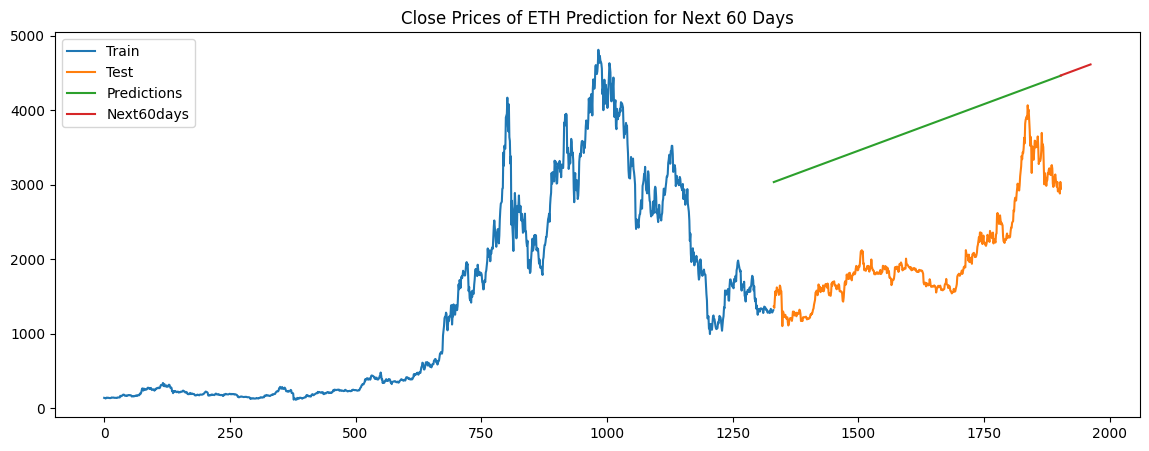

In [16]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Tạo mảng 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Dự đoán
y_next_60_days = model.predict(x_next_60_days)

# In ra dự đoán giá trong 60 ngày tiếp theo
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions','Next60days'])
plt.title(f'Close Prices of ETH Prediction for Next 60 Days')
plt.show()

Predicted closing prices for the next 90 days:
[4467.28721805 4469.79099483 4472.2947716  4474.79854838 4477.30232516
 4479.80610193 4482.30987871 4484.81365549 4487.31743227 4489.82120904
 4492.32498582 4494.8287626  4497.33253938 4499.83631615 4502.34009293
 4504.84386971 4507.34764648 4509.85142326 4512.35520004 4514.85897682
 4517.36275359 4519.86653037 4522.37030715 4524.87408392 4527.3778607
 4529.88163748 4532.38541426 4534.88919103 4537.39296781 4539.89674459
 4542.40052137 4544.90429814 4547.40807492 4549.9118517  4552.41562847
 4554.91940525 4557.42318203 4559.92695881 4562.43073558 4564.93451236
 4567.43828914 4569.94206592 4572.44584269 4574.94961947 4577.45339625
 4579.95717302 4582.4609498  4584.96472658 4587.46850336 4589.97228013
 4592.47605691 4594.97983369 4597.48361046 4599.98738724 4602.49116402
 4604.9949408  4607.49871757 4610.00249435 4612.50627113 4615.01004791
 4617.51382468 4620.01760146 4622.52137824 4625.02515501 4627.52893179
 4630.03270857 4632.53648535 46

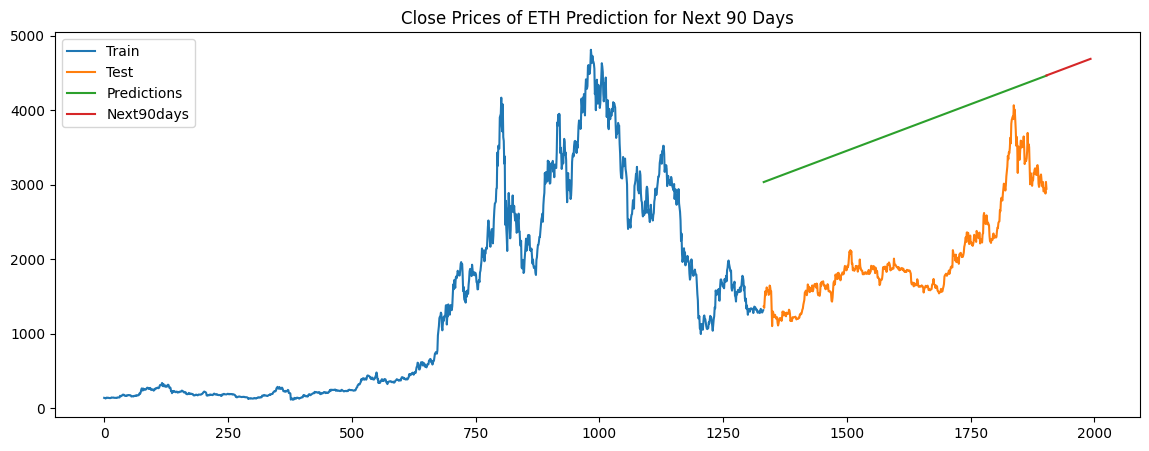

In [17]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo mảng 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán
y_next_90_days = model.predict(x_next_90_days)

# In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test','Predictions','Next90days'])
plt.title(f'Close Prices of ETH Prediction for Next 90 Days')
plt.show()

# **6:4**

In [18]:
df = pd.read_csv("ETH.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1899,2928.701904
1900,2949.359619
1901,2881.157959
1902,3037.056641


In [19]:
# Chia tập dữ liệu thành train, test
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1142
Test data size: 762


In [20]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [22]:
# Đánh giá độ chính xác
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', mape_test)
mae_test = np.mean(np.abs(y_test - y_pred))
print("Testing MAE:", mae_test)

Testing RMSE: 2936.1952070174098
Testing MAPE: 162.66290888367044
Testing MAE: 2862.848023254956


Predicted Close Prices for the next 30 days:
[6202.99957531 6206.66740045 6210.33522559 6214.00305073 6217.67087587
 6221.33870101 6225.00652615 6228.67435128 6232.34217642 6236.01000156
 6239.6778267  6243.34565184 6247.01347698 6250.68130212 6254.34912725
 6258.01695239 6261.68477753 6265.35260267 6269.02042781 6272.68825295
 6276.35607809 6280.02390323 6283.69172836 6287.3595535  6291.02737864
 6294.69520378 6298.36302892 6302.03085406 6305.6986792  6309.36650434]


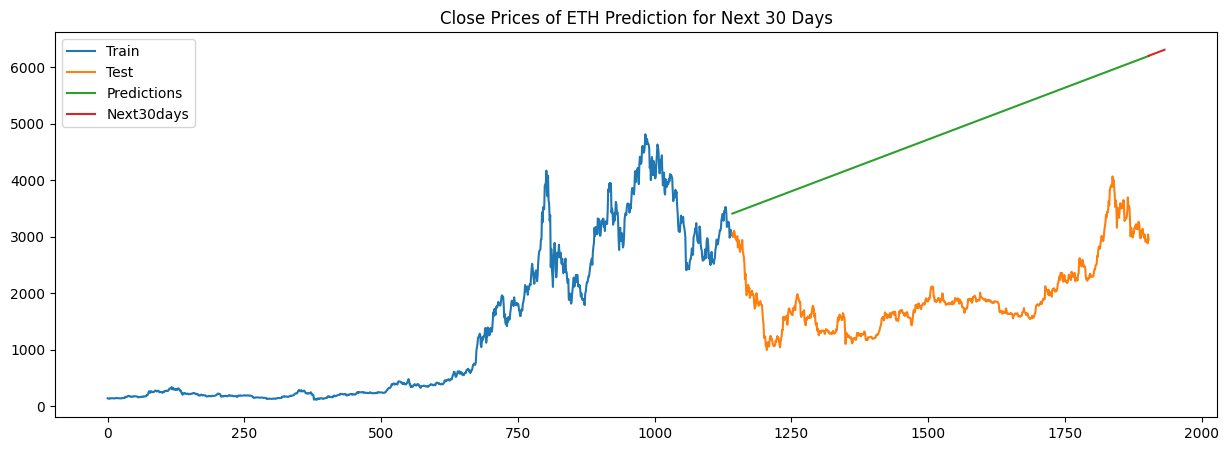

In [23]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted Close Prices for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Predictions','Next30days'])
plt.title(f'Close Prices of ETH Prediction for Next 30 Days')
plt.show()

Predicted closing prices for the next 60 days:
[6202.99957531 6206.66740045 6210.33522559 6214.00305073 6217.67087587
 6221.33870101 6225.00652615 6228.67435128 6232.34217642 6236.01000156
 6239.6778267  6243.34565184 6247.01347698 6250.68130212 6254.34912725
 6258.01695239 6261.68477753 6265.35260267 6269.02042781 6272.68825295
 6276.35607809 6280.02390323 6283.69172836 6287.3595535  6291.02737864
 6294.69520378 6298.36302892 6302.03085406 6305.6986792  6309.36650434
 6313.03432947 6316.70215461 6320.36997975 6324.03780489 6327.70563003
 6331.37345517 6335.04128031 6338.70910544 6342.37693058 6346.04475572
 6349.71258086 6353.380406   6357.04823114 6360.71605628 6364.38388142
 6368.05170655 6371.71953169 6375.38735683 6379.05518197 6382.72300711
 6386.39083225 6390.05865739 6393.72648252 6397.39430766 6401.0621328
 6404.72995794 6408.39778308 6412.06560822 6415.73343336 6419.4012585 ]


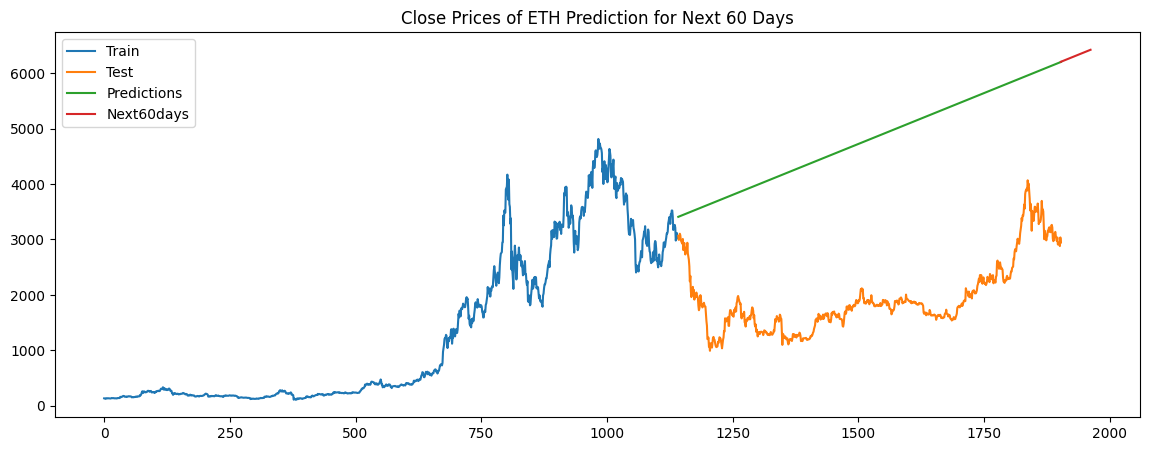

In [24]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Tạo mảng 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Dự đoán
y_next_60_days = model.predict(x_next_60_days)

# In ra dự đoán giá trong 60 ngày tiếp theo
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions','Next60days'])
plt.title(f'Close Prices of ETH Prediction for Next 60 Days')
plt.show()

Predicted closing prices for the next 90 days:
[6202.99957531 6206.66740045 6210.33522559 6214.00305073 6217.67087587
 6221.33870101 6225.00652615 6228.67435128 6232.34217642 6236.01000156
 6239.6778267  6243.34565184 6247.01347698 6250.68130212 6254.34912725
 6258.01695239 6261.68477753 6265.35260267 6269.02042781 6272.68825295
 6276.35607809 6280.02390323 6283.69172836 6287.3595535  6291.02737864
 6294.69520378 6298.36302892 6302.03085406 6305.6986792  6309.36650434
 6313.03432947 6316.70215461 6320.36997975 6324.03780489 6327.70563003
 6331.37345517 6335.04128031 6338.70910544 6342.37693058 6346.04475572
 6349.71258086 6353.380406   6357.04823114 6360.71605628 6364.38388142
 6368.05170655 6371.71953169 6375.38735683 6379.05518197 6382.72300711
 6386.39083225 6390.05865739 6393.72648252 6397.39430766 6401.0621328
 6404.72995794 6408.39778308 6412.06560822 6415.73343336 6419.4012585
 6423.06908363 6426.73690877 6430.40473391 6434.07255905 6437.74038419
 6441.40820933 6445.07603447 644

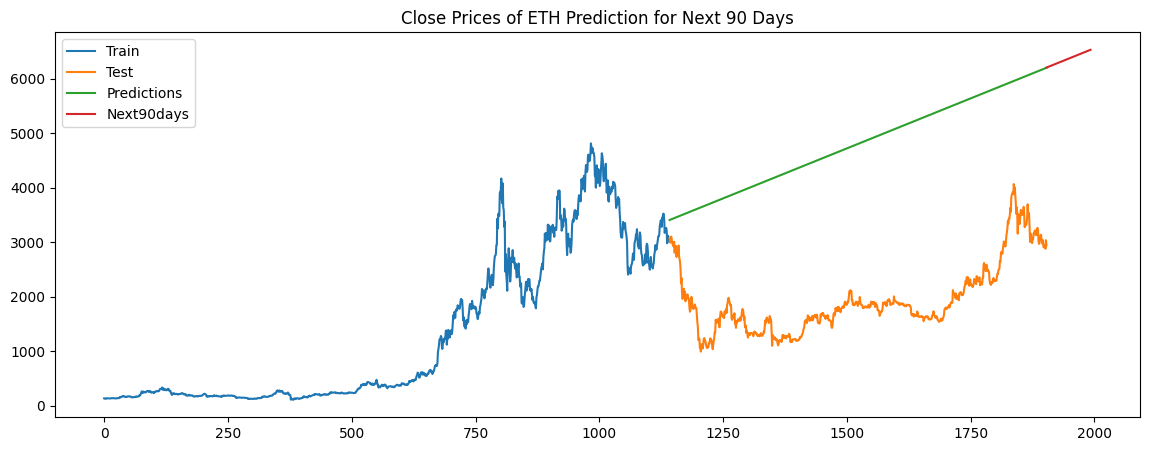

In [25]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo mảng 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán
y_next_90_days = model.predict(x_next_90_days)

# In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test','Predictions','Next90days'])
plt.title(f'Close Prices of ETH Prediction for Next 90 Days')
plt.show()